In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
%config InlineBackend.figure_format='retina'

PROC_DATA_PATH = '~/library/data/processed/'

In [12]:
# Load in the data
df = pd.read_csv(PROC_DATA_PATH + 'borough-unemployment-and-business-data.csv', index_col=0)


,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate
0,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6
1,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7
2,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8
3,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2
4,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4
5,1835.0,57.3,331000,2.06,8.8,69.4,13.865943,4.0
6,1055.0,60.1,136000,0.56,10.8,43.1,16.016635,6.2
7,1270.0,57.5,148000,0.63,10.0,54.7,12.986582,5.9
8,865.0,56.5,110000,0.54,12.0,44.0,19.496204,5.4
9,690.0,56.8,81000,0.47,10.8,49.2,17.029480,6.6


In [13]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df.iloc[:,3:])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


([<matplotlib.axis.XTick at 0x7ff4d0b58b00>,
 <a list of 5 Text xticklabel objects>)

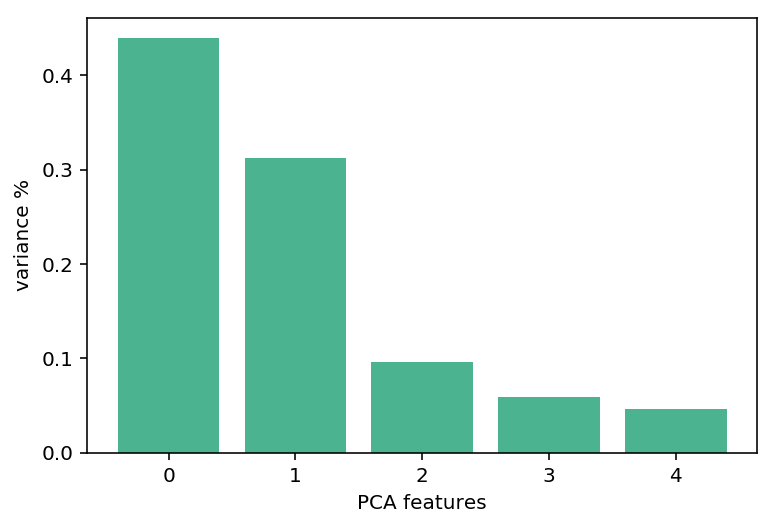

In [16]:
# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances to identify no of needed PCs
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='#4CB391')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [18]:
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

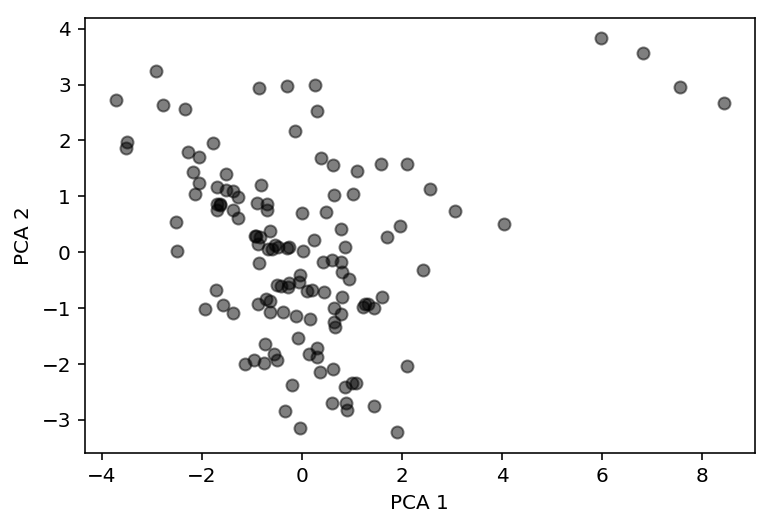

In [21]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, c='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

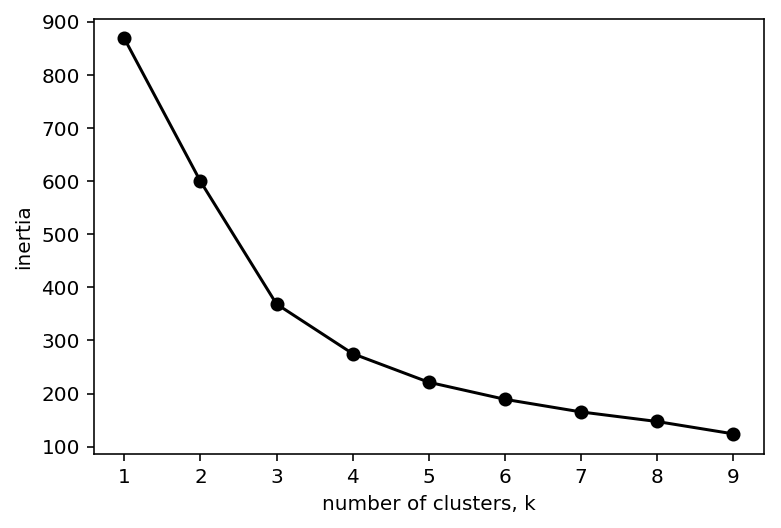

In [23]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

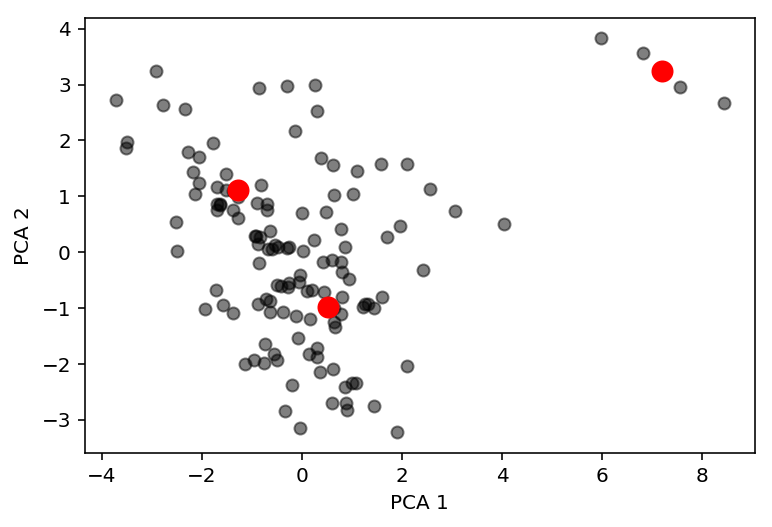

In [29]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = model.fit_predict(PCA_components.iloc[:,:3])
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, c='black')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [33]:
model.labels_

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2], dtype=int32)

In [34]:
df['group'] = model.labels_

In [37]:
df[df['group'] == 2]

,code,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,group
31,E09000033,Westminster,2011,3615.0,54.5,674000,4.16,7.8,69.4,12.549213,5.0,2
63,E09000033,Westminster,2012,3515.0,50.8,698000,4.26,7.4,72.6,8.255762,3.0,2
95,E09000033,Westminster,2013,4280.0,55.4,717000,4.39,6.7,71.7,6.074616,3.5,2
127,E09000033,Westminster,2014,4380.0,53.1,737000,4.45,6.1,76.0,3.420368,1.6,2


In [41]:
fig = px.scatter_matrix(df, dimensions=['youth_unemployment_rate','3_year_survival_rate','job_density', 'NVQ4_rate', 'no_qualif_rate'], color="group")
fig.show()